<a href="https://colab.research.google.com/github/sn19882/Ted-Storage/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import PIL
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import math

In [ ]:
f_ships = r'/content/drive/MyDrive/Kmeans/ships'
f_no_ships = r'/content/drive/MyDrive/Kmeans/no ships'

x_data = []
y_data = []

for file in os.listdir(f_ships):
    f = os.path.join(f_ships, file)
    x = cv2.imread(f,0)
    x_data.append(x)
    y_data.append('1')

for file in os.listdir(f_no_ships):
    f = os.path.join(f_no_ships, file)
    x = cv2.imread(f,0)
    x_data.append(x)
    y_data.append('0')

x_data = np.array(x_data)
print(np.shape(y_data))
reshaped_x_data = x_data.reshape(610,512*512)
pca = PCA(2)
new_x_data = pca.fit_transform(reshaped_x_data)
print(np.shape(new_x_data))
X_train, X_test, y_train, y_test = train_test_split(new_x_data, y_data, test_size=0.33, random_state=0)



(610,)
(610, 2)


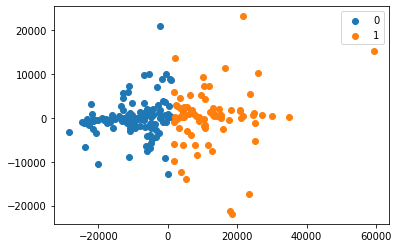

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
kmeans = KMeans(n_clusters= 2)
label = kmeans.fit_predict(X_test)
unique_label=np.unique(label)
for i in unique_label:
    plt.scatter(X_test[label == i , 0] , X_test[label == i , 1] , label = i)
plt.legend()
plt.show()

Evaluate the model

In [ ]:
y_test= [int(i) for i in y_test]
print(y_test)
y_predict = list(label)
print(y_predict)

MSE = np.square(np.subtract(y_test,y_predict)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

[0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,

In [ ]:
# Dummy Classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="uniform")
dummy.fit(x_data, y_data)
dummy.predict(x_data)

dummy.score(x_data, y_data)



0.4885245901639344

In [ ]:
# statistical significance test
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=dummy,
                          estimator2=kmeans,
                          X=reshaped_x_data, y=y_data,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.p

t statistic: 20.818
p value: 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
